# Obtenção dos Dados

Este código baixa os arquivos do [_dataset_ MNIST](https://en.wikipedia.org/wiki/MNIST_database) a partir do [site](http://yann.lecun.com/exdb/mnist/) do [Prof. Yann LeCun](https://en.wikipedia.org/wiki/Yann_LeCun).

#-------------------------------------------------------------------------------
#--         Federal University of Santa Maria             
#--               Technology Center            
#--            Computer Engineering Course
#--
#-- Author      : Luis Felipe de Deus                           
#--
#-- Created     : 21 May 2020
#-- Update      : 22 May 2020                                                  
#-------------------------------------------------------------------------------
####### JUST A SMALL IMPLEMENTATION OF ARTIFICIAL NEURAL NETWORK
####### USING FEEDFORWARD APPROACH
####### WITH BACKPROPAGATION APPROACH WITHOUT LIBRARIES
####### THE NUMBER OF NEURONS FOR EACH LAYER IS PARAMETRIZABLE
####### THE NUMBER OF HIDDEN LAYERS IS ALSO PARAMETRIZABLE


In [0]:
#Import the Libraries we need
import numpy as np
from struct import unpack
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
# Training images 
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -O train-images-idx3-ubyte.gz
# Labels for training 
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -O train-labels-idx1-ubyte.gz
# Validation images
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -O t10k-images-idx3-ubyte.gz
# Labels for validation
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -O t10k-labels-idx1-ubyte.gz

--2020-05-26 13:04:00--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.7.204, 104.28.6.204, 2606:4700:3031::681c:6cc, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.7.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  60.8MB/s    in 0.2s    

2020-05-26 13:04:00 (60.8 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2020-05-26 13:04:03--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.7.204, 104.28.6.204, 2606:4700:3033::681c:7cc, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.7.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===============

In [0]:
# Unpack files
!gunzip *.gz

In [0]:
#@brief: This function will read the file and create an 3d array
#@param: img_filename is the filename from the desired file
#@param: 3d array with the images
def read_imgs(img_filename):
  
  # Open the file
  img_file = open(img_filename,'rb')

  # Read the file head
  magic = unpack('>i', img_file.read(4))[0]
  total = unpack('>i', img_file.read(4))[0]
  height = unpack('>i', img_file.read(4))[0]
  width = unpack('>i', img_file.read(4))[0]

  #Validation test against corrupted files
  if magic != 2051:
    print('Erro, este arquivo não parece ser um arquivo de imagens MNIST')

  #3d array with the sample (image) where the image is 28*28 pixels
  imgs = np.zeros((total,height,width))

  #Populates the array
  for k in range(total): # Each sample k
    for i in range(height): # Each line i
      for j in range(width): # Each column j
        imgs[k,i,j] = ord(img_file.read(1)) # 1 byte
  
  # Return the 3darray
  return imgs

In [0]:
#@brief: This function will read the labels and create an 2d array
#@param: labels_filename is the filename from the desired file
#@param: 2d array with the images
def read_labels(labels_filename):
  
  # Open the file
  labels_file = open(labels_filename,'rb')

  # Read the file head
  magic = unpack('>i', labels_file.read(4))[0]
  total = unpack('>i', labels_file.read(4))[0]

  #Validation test against corrupted files
  if magic != 2049:
    print('Erro, este arquivo não parece ser um arquivo de imagens MNIST')

  #2d array with the sample (label)
  labels = np.zeros((total))

  #Populates the array
  for k in range(total): # Each sample k
    labels[k] = ord(labels_file.read(1)) #  1 byte
  
  # Return the 3darray
  return labels

In [0]:
# Read training data
imgs = read_imgs('train-images-idx3-ubyte')
labels = read_labels('train-labels-idx1-ubyte')

# Read validation data
imgs_val = read_imgs('t10k-images-idx3-ubyte')
labels_val = read_labels('t10k-labels-idx1-ubyte')

In [0]:
from numpy.random import shuffle

#Shuffle the image and label arrays
idxs = list(range(imgs.shape[0]))

# Embaralhamos a lista
shuffle(idxs)

# Reorganizamos as imagens e os labels
imgs = imgs[idxs]
labels = labels[idxs]

In [0]:
#@brif: This function implements the min_max normalization for a list
#@param: data is a list with samples
#@return: the normalized data
def max_min_normalization(data):
    #Normaliza the Data
    normalized, mi, ma = [], min(data), max(data)
    for x in data:
        y = (x - mi) / ( ma - mi)
        normalized.append(y)
    return normalized

In [9]:
# Create an array with 60,000 lines and 784 (28*28) columns
# Serialize the imagem for the ANN
X = np.zeros([imgs.shape[0], (imgs.shape[1]*imgs.shape[2])])

#Populates the array X 
for e,d in enumerate(imgs):
  dN = np.reshape(d,[d.shape[0]*d.shape[1],])
  #X[e] = max_min_normalization(dN)
  X[e] = (dN)/255.0
print("X Shape:",X.shape)

X Shape: (60000, 784)


In [10]:
# Create an array with the desired labels, 60,000 lines and 10 columns
# The array uses one hot encoding
POS = 10 # Number of possibilities
Y_des = np.zeros([labels.shape[0], POS])

#Create a category array
category = np.array([0,1,2,3,4,5,6,7,8,9]).astype('float')
# On this loop we will codify the array with 1.00 where is the label
# and the other 9 position with 0.00
for i in range(labels.shape[0]):
  Y_des[i:] = (category == labels[i]).astype('float')
  #print((category == labels[i]).astype('float'))
print(Y_des.shape)

(60000, 10)


In [0]:
#@brief: This function wll evaluate the ANN
#@param: p is the perceptron ANN
#@param: xTest is the validation images
#@param: yTest is the validation labels
def getAccuracy(p, xTest,yTest):
  #Evaluate the accuracy
  #Get the output for this set
  score = 0
  for e,xv in enumerate(xTest):
    ypredicted = p.forward(xv)

    #Find the highest value in the predict
    n_max = max(ypredicted)

    #Find the predicted label
    for posY_pred, it in enumerate(ypredicted):
      if(it==n_max):
        numberPredict = posY_pred

    #Find the number of label
    for posY_des,it in enumerate(yTest[e]):
      if(it==1.00):
        numberTest = posY_des
        
    #If is the same number compute one more point
    if(numberPredict == numberTest):
      score+=1
    #print("Pred:",numberPredict," - Test:", numberPredict)
  acc = (score/yTest.shape[0])*100
  #acc = score/10
  print("Accuray: ", round(acc,2), "%")

In [0]:
#@brief: Activation function
#@param: s - is tensor to be applyed to sigmoid
#@param: deriv - If True returns the derivative from sigmoid
def sigmoid(s, deriv=False):
    if (deriv == True):
        return s * (1 - s)
    return 1/(1 + np.exp(-s))

In [0]:
#Softmax function
np.set_printoptions(formatter={'float':lambda x: '%+01.2f ' % x})
def softmax(x):
  ex = np.exp(x)
  s = np.sum(ex)
  x_sft = ex/s
 
  return x_sft

In [0]:
#@brief: Implements a Perceptron Neural Network
#@param: input_size - number of neurons on input layer (e.g. 4)
#@param: hidden_layer - a list with the number of neurons on each hidden layer (e.g [4,7])
#@param: output_layer - number of neurons on output layer
class Perceptron:
  def __init__(self, input_size, hidden_layer, output_layer):
    self.ilayer = input_size
    self.hlayer = hidden_layer
    self.olayer = output_layer
    #Initalize the weights and bias for hidden layers
    pLayer = self.ilayer
    self.Wh = []
    self.bh = []
    for e,it in enumerate(self.hlayer):
      self.Wh.append(np.random.random((it,pLayer))*2.0 - 1.0)
      self.bh.append(np.random.random((it,1))*2.0 - 1.0)
      pLayer = it

    #Initalize the weights and bias for output layer
    self.Wo = np.random.random((self.olayer,self.hlayer[-1]))*2.0 - 1.0
    self.bo = np.random.random((self.olayer,1))*2.0 - 1.0

    #Learning step
    self.eta = 0.1
    
  def forward(self,x):
    #Reshape the entrance
    x = np.reshape(x,(self.ilayer,1))

    #Calculate S for the hidden layers
    self.sh = []
    self.zh = []
    pLayer = x
    for e,whl in enumerate(self.Wh):
      tmpSh = np.dot(whl,pLayer) + self.bh[e]
      self.sh.append(tmpSh)
      #Pass S through the activation function (Sigmoid)
      tmpZh = sigmoid(tmpSh)
      self.zh.append(tmpZh)
      #Update the previous layer 
      pLayer = tmpZh
  
    #Calculte S for output layer
    self.so = np.dot(self.Wo,self.zh[-1]) + self.bo

    #Pass S through the activation function (Sigmoid)
    self.zo = sigmoid(self.so)
    self.zoSoft = softmax(self.zo)
    #Return the ANN output
    return self.zoSoft

  def train(self, Xt, Yt):
    Err = 0
    #For all entries, X at a time 
    for n in range(len(Xt)):
      #Reshape the entries
      X = np.asarray(Xt[n])
      Y = Yt[n]
      X = np.reshape(X,(self.ilayer,1))
      Y = np.reshape(Y,(self.olayer,1))

      #First run ANN forward and get the array
      # with the results for the output neurons
      self.forward(X)
      self.yPred = self.zo
      #print("Y",self.yPred)
      
      #Evaluate the RMSE
      Err = sqrt(mean_squared_error(Y, self.yPred))

      #Second run the backpropagation
      self.backpropagation(X, Y)

    #Return the RMSE
    return Err

  def backpropagation(self, X, Y):
    #For the output layer
    #Delta Output layer (delta = (Erro) * derivative of sigmoid)
    dOut = (self.yPred-Y) * (sigmoid(self.zo, True))
    #Derivative of Error by Wo
    dEwo =  np.dot(dOut, self.zh[-1].T)

    ###--- Update parameters --######
    #Bias
    self.bo = self.bo - (self.eta*dOut)
    #Weights
    self.Wo = self.Wo - (self.eta*dEwo)

    #For hidden layer
    #Delta Hidden Layer (delta = (W from previuos layer) * (Previuous delta) * (derivative of sigmoid)
    pLayerW = self.Wo
    pLayerD = dOut
    pZ = len(self.zh)-1
    dHid = [] #Delta 
    dEwh = [] #Derivative of error by weight
    for e,it in enumerate(reversed(self.zh), start=1):
      tmpDelta = (np.dot(pLayerW.T, pLayerD)) * (sigmoid(it, True))
      dHid.append(tmpDelta)
      #Derivative of Error by Weight
      if(pZ>0):
        tmpDErro = np.dot(tmpDelta, (self.zh[pZ-1]).T)
      else:
        tmpDErro = np.dot(tmpDelta, (X.T))
      #Decrease position of layer
      pZ-=1

      dEwh.append(tmpDErro)
      #Update
      pLayerW = self.Wh[-e] #Minus sign because it is from the end to the beginning
      pLayerD = tmpDelta  #Keep the delta from this iteration

      ###--- Update parameters --######
      #Bias
      self.bh[-e] = self.bh[-e] - (self.eta*tmpDelta)
      #Weights
      self.Wh[-e] = self.Wh[-e] - (self.eta*tmpDErro)

In [0]:
# Split the dataset
from sklearn.model_selection import train_test_split
T = 0.4 #Percentage of test on the dataset. e.g. 0.4 =40% test, 60% trainning
xTrain, xTest, yTrain, yTest = train_test_split(X, Y_des, test_size=T)
#xTrain = X[0:24000]
#yTrain = Y_des[0:24000]
#xTest= X[24000:]
#yTest = Y_des[24000:]

In [20]:
# Create a Neural Network
iNeurons = X.shape[1] #Input Neurons is 28*28 pixels
hNeurons = [256,64] #Hidden layers 
oNeurons = 10 #Output layer, one neuron for each label
p = Perceptron(iNeurons, hNeurons, oNeurons)
#p = PerceptronvOld(iNeurons, 256,64, oNeurons)

Errl = []
# Training for 10 times
for i in range(10):

  # One step
  Err = p.train(xTrain, yTrain)
  #Err = p.backprop(xTrain, yTrain)

  print('RMSE = ',Err)
  Errl.append(Err)

RMSE =  0.16278059686929275
RMSE =  0.09878537211250411
RMSE =  0.05452462817928213
RMSE =  0.024410867108632564
RMSE =  0.016628392170902912
RMSE =  0.011376443820190062
RMSE =  0.007879999272019485
RMSE =  0.005877946314740545
RMSE =  0.005063212108295293
RMSE =  0.0038436453620926733


In [18]:
#Here we call the function to evaluate the ANN
#We use different dataset (Test set) and get
#the accuracy from the ANN
getAccuracy(p, xTest, yTest)

Accuray:  95.6 %


[13189 37780]
8.0
6.0


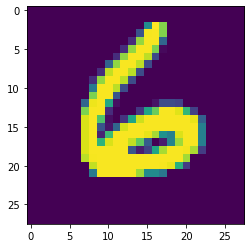

In [19]:
#Just show one image
n = np.random.randint(60000, size=2)
print(n)
for i in n:
  print(labels[i])
  plt.imshow(imgs[i])